In [1]:
'''
1. read_csv(): Read data from a CSV file into a DataFrame.
2. head(): View the first few rows of a DataFrame.
3. tail(): View the last few rows of a DataFrame.
4. info(): Display information about the DataFrame, including data types and missing values.
5. describe(): Generate descriptive statistics of the DataFrame's numeric columns.
6. shape: Get the number of rows and columns in the DataFrame.
7. columns: Access the column labels of the DataFrame.
8. index: Access the row index labels of the DataFrame.
9. sort_values(): Sort the DataFrame by one or more columns.
10. groupby(): Group rows based on one or more columns.
11. agg(): Perform aggregation operations on grouped data.
12. pivot_table(): Create a pivot table from a DataFrame.
13. fillna(): Replace missing values in the DataFrame with specified values.
14. drop(): Remove specified rows or columns from the DataFrame.
15. rename(): Rename columns or index labels.
16. isin(): Check if values are present in a Series or DataFrame.
17. loc[]: Access rows and columns by labels.
18. iloc[]: Access rows and columns by integer positions.
19. apply(): Apply a function to each element or row in a DataFrame.
20. map(): Apply a function to each element in a Series.
21. astype(): Convert the data type of a Series or DataFrame.
22. duplicated(): Identify duplicated rows.
23. drop_duplicates(): Remove duplicated rows from a DataFrame.
24. merge(): Combine two DataFrames based on common columns.
25. crosstab(): Create a cross-tabulation table.
26. resample(): Resample time-series data.
27. pivot(): Pivot a long-format DataFrame to a wide format.
28. stack(): Stack the columns of a DataFrame.
29. unstack(): Unstack a multi-indexed DataFrame.
30. corr(): Calculate the correlation between numeric columns.
'''
import pandas as pd


In [2]:
filename = 'C:/Code Stuff/python-training/HW-07-10/30-functions/NIFTY 50-08-10-2022-to-07-10-2023.csv'

df = pd.read_csv(filename, sep=',')
#Remove all whitespaces and info in the brackets like units etc.
df['Date'] = df['Date'].str.replace(r'(\d. )|[$@#]|\(.*\)',' ', regex=True)
df

,Date,Open,High,Low,Close,Shares Traded,Turnover(₹ Cr)
0,10-OCT-2022,17094.35,17280.15,17064.70,17241.00,234005512.0,16220.67
1,11-OCT-2022,17256.05,17261.80,16950.30,16983.55,282617982.0,22178.37
2,12-OCT-2022,17025.55,17142.35,16960.05,17123.60,256037322.0,18098.41
3,13-OCT-2022,17087.35,17112.35,16956.95,17014.35,266438674.0,18189.64
4,14-OCT-2022,17322.30,17348.55,17169.75,17185.70,226997138.0,17813.47
...,...,...,...,...,...,...,...
242,29-SEP-2023,19581.20,19726.25,19551.05,19638.30,243508919.0,20978.72
243,03-OCT-2023,19622.40,19623.20,19479.65,19528.75,221719625.0,21459.58
244,04-OCT-2023,19446.30,19457.80,19333.60,19436.10,277148310.0,26017.47
245,05-OCT-2023,19521.85,19576.95,19487.30,19545.75,234865323.0,22019.04


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            247 non-null    object 
 1   Open            247 non-null    float64
 2   High            247 non-null    float64
 3   Low             247 non-null    float64
 4   Close           247 non-null    float64
 5   Shares Traded   246 non-null    float64
 6   Turnover(₹ Cr)  246 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.6+ KB


In [4]:
df.shape

(247, 7)

In [5]:
df.describe()

,Open,High,Low,Close,Shares Traded,Turnover(₹ Cr)
count,247.000000,247.000000,247.000000,247.000000,2.460000e+02,246.000000
mean,18451.815587,18514.486640,18358.633401,18440.207287,2.631476e+08,22615.045407
std,831.153082,825.910757,841.515126,835.864421,7.145950e+07,6424.229673
min,16977.300000,17061.750000,16828.350000,16945.050000,4.502948e+07,3772.490000
25%,17815.825000,17878.825000,17721.725000,17813.000000,2.215210e+08,19082.702500
50%,18300.450000,18344.200000,18209.800000,18286.500000,2.498175e+08,21679.175000
75%,19311.200000,19383.050000,19254.650000,19327.175000,2.809895e+08,24663.107500
max,20156.450000,20222.450000,20129.700000,20192.350000,6.964958e+08,70755.080000


In [6]:
#1 get data row with certain condition

df[(df.Open == 17094.35)]
df[(df.Open > 17000) & (df.Close < 17100)].head(2).tail(1)

,Date,Open,High,Low,Close,Shares Traded,Turnover(₹ Cr)
3,13-OCT-2022,17087.35,17112.35,16956.95,17014.35,266438674.0,18189.64


In [7]:
#2 add a column with a specific calculation
# Shift the "close" column by one row to get the previous day's close
df['previous_close'] = df['Close'].shift(1)

# Calculate the difference between today's open and yesterday's close
df['open_minus_previous_close'] = df['Open'] - df['previous_close']
df['net diff'] = df['open_minus_previous_close']*100/df['previous_close']
df

,Date,Open,High,Low,Close,Shares Traded,Turnover(₹ Cr),previous_close,open_minus_previous_close,net diff
0,10-OCT-2022,17094.35,17280.15,17064.70,17241.00,234005512.0,16220.67,NaN,NaN,NaN
1,11-OCT-2022,17256.05,17261.80,16950.30,16983.55,282617982.0,22178.37,17241.00,15.05,0.087292
2,12-OCT-2022,17025.55,17142.35,16960.05,17123.60,256037322.0,18098.41,16983.55,42.00,0.247298
3,13-OCT-2022,17087.35,17112.35,16956.95,17014.35,266438674.0,18189.64,17123.60,-36.25,-0.211696
4,14-OCT-2022,17322.30,17348.55,17169.75,17185.70,226997138.0,17813.47,17014.35,307.95,1.809943
...,...,...,...,...,...,...,...,...,...,...
242,29-SEP-2023,19581.20,19726.25,19551.05,19638.30,243508919.0,20978.72,19523.55,57.65,0.295284
243,03-OCT-2023,19622.40,19623.20,19479.65,19528.75,221719625.0,21459.58,19638.30,-15.90,-0.080964
244,04-OCT-2023,19446.30,19457.80,19333.60,19436.10,277148310.0,26017.47,19528.75,-82.45,-0.422198
245,05-OCT-2023,19521.85,19576.95,19487.30,19545.75,234865323.0,22019.04,19436.10,85.75,0.441189


In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover(₹ Cr)', 'previous_close', 'open_minus_previous_close',
       'net diff'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=247, step=1)

In [10]:
#Sort by Multiple Columns in Descending Order:
sorted_df = df.sort_values(by=['Date', 'Open'], ascending=[False, False])
sorted_df


,Date,Open,High,Low,Close,Shares Traded,Turnover(₹ Cr),previous_close,open_minus_previous_close,net diff
14,31-OCT-2022,17910.20,18022.80,17899.90,18012.20,227174539.0,19846.47,17786.80,123.40,0.693773
158,31-MAY-2023,18594.20,18603.90,18483.85,18534.40,696495765.0,70755.08,18633.85,-39.65,-0.212785
119,31-MAR-2023,17210.35,17381.60,17204.65,17359.75,263889033.0,24970.98,17080.70,129.65,0.759044
200,31-JUL-2023,19666.35,19772.75,19597.60,19753.80,295053318.0,23075.38,19646.05,20.30,0.103329
78,31-JAN-2023,17731.45,17735.70,17537.55,17662.15,398338541.0,35023.70,17648.95,82.50,0.467450
...,...,...,...,...,...,...,...,...,...,...
99,01-MAR-2023,17360.10,17467.75,17345.25,17450.90,272881409.0,19784.53,17303.95,56.15,0.324492
159,01-JUN-2023,18579.40,18580.30,18464.55,18487.75,265630759.0,24056.99,18534.40,45.00,0.242792
79,01-FEB-2023,17811.60,17972.20,17353.40,17616.30,512870802.0,38486.19,17662.15,149.45,0.846160
36,01-DEC-2022,18871.95,18887.60,18778.20,18812.50,324955829.0,22216.65,18758.35,113.60,0.605597


In [11]:
'''
13. fillna(): Replace missing values in the DataFrame with specified values.
14. drop(): Remove specified rows or columns from the DataFrame.
15. rename(): Rename columns or index labels.
'''
df.fillna(0)

,Date,Open,High,Low,Close,Shares Traded,Turnover(₹ Cr),previous_close,open_minus_previous_close,net diff
0,10-OCT-2022,17094.35,17280.15,17064.70,17241.00,234005512.0,16220.67,0.00,0.00,0.000000
1,11-OCT-2022,17256.05,17261.80,16950.30,16983.55,282617982.0,22178.37,17241.00,15.05,0.087292
2,12-OCT-2022,17025.55,17142.35,16960.05,17123.60,256037322.0,18098.41,16983.55,42.00,0.247298
3,13-OCT-2022,17087.35,17112.35,16956.95,17014.35,266438674.0,18189.64,17123.60,-36.25,-0.211696
4,14-OCT-2022,17322.30,17348.55,17169.75,17185.70,226997138.0,17813.47,17014.35,307.95,1.809943
...,...,...,...,...,...,...,...,...,...,...
242,29-SEP-2023,19581.20,19726.25,19551.05,19638.30,243508919.0,20978.72,19523.55,57.65,0.295284
243,03-OCT-2023,19622.40,19623.20,19479.65,19528.75,221719625.0,21459.58,19638.30,-15.90,-0.080964
244,04-OCT-2023,19446.30,19457.80,19333.60,19436.10,277148310.0,26017.47,19528.75,-82.45,-0.422198
245,05-OCT-2023,19521.85,19576.95,19487.30,19545.75,234865323.0,22019.04,19436.10,85.75,0.441189


In [12]:
# Drop the "open_minus_previous_close" column
df_dropped = df.drop(columns='open_minus_previous_close')

df_dropped


,Date,Open,High,Low,Close,Shares Traded,Turnover(₹ Cr),previous_close,net diff
0,10-OCT-2022,17094.35,17280.15,17064.70,17241.00,234005512.0,16220.67,NaN,NaN
1,11-OCT-2022,17256.05,17261.80,16950.30,16983.55,282617982.0,22178.37,17241.00,0.087292
2,12-OCT-2022,17025.55,17142.35,16960.05,17123.60,256037322.0,18098.41,16983.55,0.247298
3,13-OCT-2022,17087.35,17112.35,16956.95,17014.35,266438674.0,18189.64,17123.60,-0.211696
4,14-OCT-2022,17322.30,17348.55,17169.75,17185.70,226997138.0,17813.47,17014.35,1.809943
...,...,...,...,...,...,...,...,...,...
242,29-SEP-2023,19581.20,19726.25,19551.05,19638.30,243508919.0,20978.72,19523.55,0.295284
243,03-OCT-2023,19622.40,19623.20,19479.65,19528.75,221719625.0,21459.58,19638.30,-0.080964
244,04-OCT-2023,19446.30,19457.80,19333.60,19436.10,277148310.0,26017.47,19528.75,-0.422198
245,05-OCT-2023,19521.85,19576.95,19487.30,19545.75,234865323.0,22019.04,19436.10,0.441189


In [13]:
# Drop rows with index labels
df_dropped = df.drop([0, 1, 2, 3, 4])
df_dropped

,Date,Open,High,Low,Close,Shares Traded,Turnover(₹ Cr),previous_close,open_minus_previous_close,net diff
5,17-OCT-2022,17144.80,17328.55,17098.55,17311.80,212223419.0,16887.83,17185.70,-40.90,-0.237989
6,18-OCT-2022,17438.75,17527.80,17434.05,17486.95,239493630.0,18224.95,17311.80,126.95,0.733315
7,19-OCT-2022,17568.15,17607.60,17472.85,17512.25,210480869.0,17200.79,17486.95,81.20,0.464346
8,20-OCT-2022,17423.10,17584.15,17421.00,17563.95,249604832.0,18345.60,17512.25,-89.15,-0.509072
9,21-OCT-2022,17622.85,17670.15,17520.75,17576.30,277702680.0,23547.38,17563.95,58.90,0.335346
...,...,...,...,...,...,...,...,...,...,...
242,29-SEP-2023,19581.20,19726.25,19551.05,19638.30,243508919.0,20978.72,19523.55,57.65,0.295284
243,03-OCT-2023,19622.40,19623.20,19479.65,19528.75,221719625.0,21459.58,19638.30,-15.90,-0.080964
244,04-OCT-2023,19446.30,19457.80,19333.60,19436.10,277148310.0,26017.47,19528.75,-82.45,-0.422198
245,05-OCT-2023,19521.85,19576.95,19487.30,19545.75,234865323.0,22019.04,19436.10,85.75,0.441189


In [14]:
# Drop rows where Open is less than 17000
df_dropped = df[df['Open'] > 17000]
df_dropped

,Date,Open,High,Low,Close,Shares Traded,Turnover(₹ Cr),previous_close,open_minus_previous_close,net diff
0,10-OCT-2022,17094.35,17280.15,17064.70,17241.00,234005512.0,16220.67,NaN,NaN,NaN
1,11-OCT-2022,17256.05,17261.80,16950.30,16983.55,282617982.0,22178.37,17241.00,15.05,0.087292
2,12-OCT-2022,17025.55,17142.35,16960.05,17123.60,256037322.0,18098.41,16983.55,42.00,0.247298
3,13-OCT-2022,17087.35,17112.35,16956.95,17014.35,266438674.0,18189.64,17123.60,-36.25,-0.211696
4,14-OCT-2022,17322.30,17348.55,17169.75,17185.70,226997138.0,17813.47,17014.35,307.95,1.809943
...,...,...,...,...,...,...,...,...,...,...
242,29-SEP-2023,19581.20,19726.25,19551.05,19638.30,243508919.0,20978.72,19523.55,57.65,0.295284
243,03-OCT-2023,19622.40,19623.20,19479.65,19528.75,221719625.0,21459.58,19638.30,-15.90,-0.080964
244,04-OCT-2023,19446.30,19457.80,19333.60,19436.10,277148310.0,26017.47,19528.75,-82.45,-0.422198
245,05-OCT-2023,19521.85,19576.95,19487.30,19545.75,234865323.0,22019.04,19436.10,85.75,0.441189


In [15]:
# Drop rows with missing values
df_dropped = df.dropna()
df_dropped

,Date,Open,High,Low,Close,Shares Traded,Turnover(₹ Cr),previous_close,open_minus_previous_close,net diff
1,11-OCT-2022,17256.05,17261.80,16950.30,16983.55,282617982.0,22178.37,17241.00,15.05,0.087292
2,12-OCT-2022,17025.55,17142.35,16960.05,17123.60,256037322.0,18098.41,16983.55,42.00,0.247298
3,13-OCT-2022,17087.35,17112.35,16956.95,17014.35,266438674.0,18189.64,17123.60,-36.25,-0.211696
4,14-OCT-2022,17322.30,17348.55,17169.75,17185.70,226997138.0,17813.47,17014.35,307.95,1.809943
5,17-OCT-2022,17144.80,17328.55,17098.55,17311.80,212223419.0,16887.83,17185.70,-40.90,-0.237989
...,...,...,...,...,...,...,...,...,...,...
242,29-SEP-2023,19581.20,19726.25,19551.05,19638.30,243508919.0,20978.72,19523.55,57.65,0.295284
243,03-OCT-2023,19622.40,19623.20,19479.65,19528.75,221719625.0,21459.58,19638.30,-15.90,-0.080964
244,04-OCT-2023,19446.30,19457.80,19333.60,19436.10,277148310.0,26017.47,19528.75,-82.45,-0.422198
245,05-OCT-2023,19521.85,19576.95,19487.30,19545.75,234865323.0,22019.04,19436.10,85.75,0.441189


In [16]:
# Rename columns using a function
df.rename(columns=str.upper, inplace=True)
df


,DATE,OPEN,HIGH,LOW,CLOSE,SHARES TRADED,TURNOVER(₹ CR),PREVIOUS_CLOSE,OPEN_MINUS_PREVIOUS_CLOSE,NET DIFF
0,10-OCT-2022,17094.35,17280.15,17064.70,17241.00,234005512.0,16220.67,NaN,NaN,NaN
1,11-OCT-2022,17256.05,17261.80,16950.30,16983.55,282617982.0,22178.37,17241.00,15.05,0.087292
2,12-OCT-2022,17025.55,17142.35,16960.05,17123.60,256037322.0,18098.41,16983.55,42.00,0.247298
3,13-OCT-2022,17087.35,17112.35,16956.95,17014.35,266438674.0,18189.64,17123.60,-36.25,-0.211696
4,14-OCT-2022,17322.30,17348.55,17169.75,17185.70,226997138.0,17813.47,17014.35,307.95,1.809943
...,...,...,...,...,...,...,...,...,...,...
242,29-SEP-2023,19581.20,19726.25,19551.05,19638.30,243508919.0,20978.72,19523.55,57.65,0.295284
243,03-OCT-2023,19622.40,19623.20,19479.65,19528.75,221719625.0,21459.58,19638.30,-15.90,-0.080964
244,04-OCT-2023,19446.30,19457.80,19333.60,19436.10,277148310.0,26017.47,19528.75,-82.45,-0.422198
245,05-OCT-2023,19521.85,19576.95,19487.30,19545.75,234865323.0,22019.04,19436.10,85.75,0.441189


In [17]:
# Rename index labels
df.rename(index={0: 'STALE', 1: 'STALE'}, inplace=True)
df

,DATE,OPEN,HIGH,LOW,CLOSE,SHARES TRADED,TURNOVER(₹ CR),PREVIOUS_CLOSE,OPEN_MINUS_PREVIOUS_CLOSE,NET DIFF
STALE,10-OCT-2022,17094.35,17280.15,17064.70,17241.00,234005512.0,16220.67,NaN,NaN,NaN
STALE,11-OCT-2022,17256.05,17261.80,16950.30,16983.55,282617982.0,22178.37,17241.00,15.05,0.087292
2,12-OCT-2022,17025.55,17142.35,16960.05,17123.60,256037322.0,18098.41,16983.55,42.00,0.247298
3,13-OCT-2022,17087.35,17112.35,16956.95,17014.35,266438674.0,18189.64,17123.60,-36.25,-0.211696
4,14-OCT-2022,17322.30,17348.55,17169.75,17185.70,226997138.0,17813.47,17014.35,307.95,1.809943
...,...,...,...,...,...,...,...,...,...,...
242,29-SEP-2023,19581.20,19726.25,19551.05,19638.30,243508919.0,20978.72,19523.55,57.65,0.295284
243,03-OCT-2023,19622.40,19623.20,19479.65,19528.75,221719625.0,21459.58,19638.30,-15.90,-0.080964
244,04-OCT-2023,19446.30,19457.80,19333.60,19436.10,277148310.0,26017.47,19528.75,-82.45,-0.422198
245,05-OCT-2023,19521.85,19576.95,19487.30,19545.75,234865323.0,22019.04,19436.10,85.75,0.441189


In [18]:
#Access the data in the column as list object
lst = df['OPEN']
for item in lst:
    print(item + 1)

17095.35
17257.05
17026.55
17088.35
17323.3
17145.8
17439.75
17569.15
17424.1
17623.85
17737.35
17809.3
17772.4
17757.4
17911.2
18131.7
18178.9
17969.35
18054.4
18212.75
18289.25
18045.35
18273.35
18377.4
18363.75
18399.25
18359.7
18383.95
18247.4
18180.15
18326.2
18327.1
18529.45
18431.55
18553.45
18626.7
18872.95
18753.4
18720.55
18601.65
18639.85
18571.85
18663.4
18403.15
18525.4
18672.25
18615.4
18320.1
18289.1
18341.3
18436.15
18289.8
17978.65
17831.4
18090.8
18085.75
18046.7
18260.1
18132.7
18164.2
18231.65
18102.95
18009.05
17953.55
18122.3
17925.25
17921.85
17868.5
18034.15
17923.8
18075.3
18120.8
18116.6
18119.45
18184.95
18094.35
17878.2
17542.95
17732.45
17812.6
17518.1
17722.75
17819.55
17791.1
17751.3
17886.5
17848.55
17860.1
17841.35
17897.6
18095.75
17975.85
17966.55
17906.8
17756.35
17575.65
17592.35
17429.6
17384.25
17361.1
17422.5
17452.25
17681.35
17666.75
17773.05
17444.8
17422.9
17161.55
17167.45
16995.65
17112.8
17067.6
17061.4
17178.45
17098.4
17077.2
16985.3
170

In [19]:
# Select rows
selected_data = df.loc['STALE':'STALE', 'OPEN':'CLOSE']
selected_data

,OPEN,HIGH,LOW,CLOSE
STALE,17094.35,17280.15,17064.7,17241.00
STALE,17256.05,17261.80,16950.3,16983.55


In [20]:
# Select all rows for columns 'OPEN' and 'CLOSE'
selected_data = df.loc[:, ['OPEN', 'CLOSE']]
selected_data

,OPEN,CLOSE
STALE,17094.35,17241.00
STALE,17256.05,16983.55
2,17025.55,17123.60
3,17087.35,17014.35
4,17322.30,17185.70
...,...,...
242,19581.20,19638.30
243,19622.40,19528.75
244,19446.30,19436.10
245,19521.85,19545.75


In [21]:
# Select all rows from 100 to 105
selected_data = df.iloc[100:105]
selected_data

,DATE,OPEN,HIGH,LOW,CLOSE,SHARES TRADED,TURNOVER(₹ CR),PREVIOUS_CLOSE,OPEN_MINUS_PREVIOUS_CLOSE,NET DIFF
100,02-MAR-2023,17421.50,17445.80,17306.00,17321.90,310669094.0,22068.68,17450.90,-29.40,-0.168473
101,03-MAR-2023,17451.25,17644.75,17427.70,17594.35,356169518.0,24143.96,17321.90,129.35,0.746743
102,06-MAR-2023,17680.35,17799.95,17671.95,17711.45,362801096.0,26959.41,17594.35,86.00,0.488793
103,08-MAR-2023,17665.75,17766.50,17602.25,17754.40,267041402.0,23155.56,17711.45,-45.70,-0.258025
104,09-MAR-2023,17772.05,17772.35,17573.60,17589.60,262352056.0,21964.17,17754.40,17.65,0.099412


In [22]:
# Select only rows 100 to 105
selected_data = df.loc[[100,105]]
selected_data

,DATE,OPEN,HIGH,LOW,CLOSE,SHARES TRADED,TURNOVER(₹ CR),PREVIOUS_CLOSE,OPEN_MINUS_PREVIOUS_CLOSE,NET DIFF
100,02-MAR-2023,17421.5,17445.8,17306.00,17321.9,310669094.0,22068.68,17450.9,-29.4,-0.168473
105,10-MAR-2023,17443.8,17451.5,17324.35,17412.9,235927570.0,19794.73,17589.6,-145.8,-0.828899


In [23]:
# Apply a funciton to a column
# Copy the "NET DIFF" column to a new column "NET DIFF from mean" and miuns the mean
df['NET DIFF from mean'] = df['NET DIFF'].copy().apply(lambda x: x - df['NET DIFF'].mean())
df

,DATE,OPEN,HIGH,LOW,CLOSE,SHARES TRADED,TURNOVER(₹ CR),PREVIOUS_CLOSE,OPEN_MINUS_PREVIOUS_CLOSE,NET DIFF,NET DIFF from mean
STALE,10-OCT-2022,17094.35,17280.15,17064.70,17241.00,234005512.0,16220.67,NaN,NaN,NaN,NaN
STALE,11-OCT-2022,17256.05,17261.80,16950.30,16983.55,282617982.0,22178.37,17241.00,15.05,0.087292,-0.034620
2,12-OCT-2022,17025.55,17142.35,16960.05,17123.60,256037322.0,18098.41,16983.55,42.00,0.247298,0.125387
3,13-OCT-2022,17087.35,17112.35,16956.95,17014.35,266438674.0,18189.64,17123.60,-36.25,-0.211696,-0.333608
4,14-OCT-2022,17322.30,17348.55,17169.75,17185.70,226997138.0,17813.47,17014.35,307.95,1.809943,1.688031
...,...,...,...,...,...,...,...,...,...,...,...
242,29-SEP-2023,19581.20,19726.25,19551.05,19638.30,243508919.0,20978.72,19523.55,57.65,0.295284,0.173373
243,03-OCT-2023,19622.40,19623.20,19479.65,19528.75,221719625.0,21459.58,19638.30,-15.90,-0.080964,-0.202876
244,04-OCT-2023,19446.30,19457.80,19333.60,19436.10,277148310.0,26017.47,19528.75,-82.45,-0.422198,-0.544110
245,05-OCT-2023,19521.85,19576.95,19487.30,19545.75,234865323.0,22019.04,19436.10,85.75,0.441189,0.319278


In [24]:
# Map
# Add a new column, If NET DIFF is positive say GREEN or say RED

# Use the map() method to create the new "COLOR" column
df['COLOR'] = df['NET DIFF'].map(lambda net_diff : 'GREEN' if net_diff > 0 else 'RED')
df['COLOR'].unique()
df

,DATE,OPEN,HIGH,LOW,CLOSE,SHARES TRADED,TURNOVER(₹ CR),PREVIOUS_CLOSE,OPEN_MINUS_PREVIOUS_CLOSE,NET DIFF,NET DIFF from mean,COLOR
STALE,10-OCT-2022,17094.35,17280.15,17064.70,17241.00,234005512.0,16220.67,NaN,NaN,NaN,NaN,RED
STALE,11-OCT-2022,17256.05,17261.80,16950.30,16983.55,282617982.0,22178.37,17241.00,15.05,0.087292,-0.034620,GREEN
2,12-OCT-2022,17025.55,17142.35,16960.05,17123.60,256037322.0,18098.41,16983.55,42.00,0.247298,0.125387,GREEN
3,13-OCT-2022,17087.35,17112.35,16956.95,17014.35,266438674.0,18189.64,17123.60,-36.25,-0.211696,-0.333608,RED
4,14-OCT-2022,17322.30,17348.55,17169.75,17185.70,226997138.0,17813.47,17014.35,307.95,1.809943,1.688031,GREEN
...,...,...,...,...,...,...,...,...,...,...,...,...
242,29-SEP-2023,19581.20,19726.25,19551.05,19638.30,243508919.0,20978.72,19523.55,57.65,0.295284,0.173373,GREEN
243,03-OCT-2023,19622.40,19623.20,19479.65,19528.75,221719625.0,21459.58,19638.30,-15.90,-0.080964,-0.202876,RED
244,04-OCT-2023,19446.30,19457.80,19333.60,19436.10,277148310.0,26017.47,19528.75,-82.45,-0.422198,-0.544110,RED
245,05-OCT-2023,19521.85,19576.95,19487.30,19545.75,234865323.0,22019.04,19436.10,85.75,0.441189,0.319278,GREEN


In [25]:

# Copy the first row
first_row = df.iloc[0:1].copy()

# Insert the copied row as the first row, shifting other rows down
df = pd.concat([first_row, df], ignore_index=True)

df.duplicated()

0      False
1       True
2      False
3      False
4      False
       ...  
243    False
244    False
245    False
246    False
247    False
Length: 248, dtype: bool

In [26]:
df = df.drop_duplicates()
df.duplicated()
df

,DATE,OPEN,HIGH,LOW,CLOSE,SHARES TRADED,TURNOVER(₹ CR),PREVIOUS_CLOSE,OPEN_MINUS_PREVIOUS_CLOSE,NET DIFF,NET DIFF from mean,COLOR
0,10-OCT-2022,17094.35,17280.15,17064.70,17241.00,234005512.0,16220.67,NaN,NaN,NaN,NaN,RED
2,11-OCT-2022,17256.05,17261.80,16950.30,16983.55,282617982.0,22178.37,17241.00,15.05,0.087292,-0.034620,GREEN
3,12-OCT-2022,17025.55,17142.35,16960.05,17123.60,256037322.0,18098.41,16983.55,42.00,0.247298,0.125387,GREEN
4,13-OCT-2022,17087.35,17112.35,16956.95,17014.35,266438674.0,18189.64,17123.60,-36.25,-0.211696,-0.333608,RED
5,14-OCT-2022,17322.30,17348.55,17169.75,17185.70,226997138.0,17813.47,17014.35,307.95,1.809943,1.688031,GREEN
...,...,...,...,...,...,...,...,...,...,...,...,...
243,29-SEP-2023,19581.20,19726.25,19551.05,19638.30,243508919.0,20978.72,19523.55,57.65,0.295284,0.173373,GREEN
244,03-OCT-2023,19622.40,19623.20,19479.65,19528.75,221719625.0,21459.58,19638.30,-15.90,-0.080964,-0.202876,RED
245,04-OCT-2023,19446.30,19457.80,19333.60,19436.10,277148310.0,26017.47,19528.75,-82.45,-0.422198,-0.544110,RED
246,05-OCT-2023,19521.85,19576.95,19487.30,19545.75,234865323.0,22019.04,19436.10,85.75,0.441189,0.319278,GREEN


In [27]:
# Create a sample DataFrame
data = {
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'F'],
    'Favorite_Fruit': ['Apple', 'Banana', 'Apple', 'Banana', 'Orange', 'Apple', 'Banana', 'Apple', 'Banana', 'Orange', 'Apple']
}

df_cross = pd.DataFrame(data)

# Create a cross-tabulation table using crosstab()
cross_tab = pd.crosstab(df_cross['Gender'], df_cross['Favorite_Fruit'])

cross_tab


Favorite_Fruit,Apple,Banana,Orange
Gender,,,
F,2,4,0
M,3,0,2


In [28]:
#24. merge(): Combine two DataFrames based on common columns.

data_fruits = {
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'F'],
    'Favorite_Fruit': ['Apple', 'Banana', 'Apple', 'Banana', 'Orange', 'Apple', 'Banana', 'Apple', 'Banana', 'Orange', 'Apple']
}

data_colors = {
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'F'],
    'Favorite_Color': ['Red', 'Red', 'Red', 'Green', 'Blue', 'Green', 'Red', 'Blue', 'Green', 'Green', 'Green']
}

df_fruits = pd.DataFrame(data_fruits)
df_colors = pd.DataFrame(data_colors)

# Merge the two DataFrames based on the 'Gender' column
merged_df = df_fruits.merge(df_colors, on='Gender')
merged_df.drop_duplicates()

,Gender,Favorite_Fruit,Favorite_Color
0,M,Apple,Red
2,M,Apple,Blue
4,M,Apple,Green
10,M,Orange,Red
12,M,Orange,Blue
14,M,Orange,Green
25,F,Banana,Red
26,F,Banana,Green
37,F,Apple,Red
38,F,Apple,Green


In [29]:
'''
28. stack(): Stack the columns of a DataFrame.
29. unstack(): Unstack a multi-indexed DataFrame.
30. corr(): Calculate the correlation between numeric columns.
'''

stacked_df = df[['OPEN', 'CLOSE']]
stacked_df

,OPEN,CLOSE
0,17094.35,17241.00
2,17256.05,16983.55
3,17025.55,17123.60
4,17087.35,17014.35
5,17322.30,17185.70
...,...,...
243,19581.20,19638.30
244,19622.40,19528.75
245,19446.30,19436.10
246,19521.85,19545.75


In [30]:
#29. unstack(): Unstack a multi-indexed DataFrame.
unstacked_df = stacked_df.unstack()
unstacked_df

OPEN   0      17094.35
       2      17256.05
       3      17025.55
       4      17087.35
       5      17322.30
                ...   
CLOSE  243    19638.30
       244    19528.75
       245    19436.10
       246    19545.75
       247    19653.50
Length: 494, dtype: float64

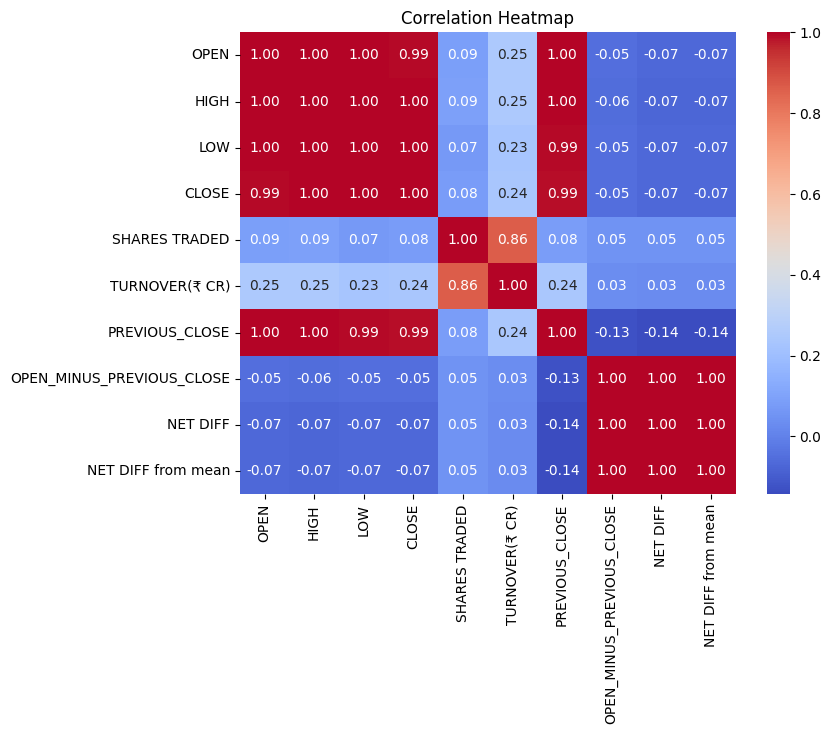

In [31]:
#30. corr(): Calculate the correlation between numeric columns.

# create a heat map showing correlation between variables
import seaborn as sns
import matplotlib.pyplot as plt

# Filter columns with numeric (float and int) data types
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()